In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn
import pickleshare as ps

In [2]:
books_big = pd.read_csv('data/books2.csv', sep=',', header=0, low_memory=False)
ratings = pd.read_csv('data/ratings.csv', sep=',', header=0)
users = pd.read_csv('data/users.csv', sep=',', header=0)

In [3]:
books_big.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
!ls -lh data/books2.csv

-rw-r--r--@ 1 susanneferschl  staff    70M 27 Aug 14:47 data/books2.csv


In [5]:
# dropping URLS columns as they are not needed

books_big.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books_big.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [6]:
#making headers lowercase and snakecase

books_big.columns = books_big.columns.str.lower()
books_big.columns = books_big.columns.str.replace('-', '_')
books_big.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [7]:
# Define the specific ISBN numbers and the replacement publisher name
isbn_to_replace = ['193169656X', '1931696993']  # Replace with actual ISBN numbers
replacement_publisher = 'NovelBooks'

# Replace the publisher name
books_big.loc[books_big['isbn'].isin(isbn_to_replace), 'publisher'] = replacement_publisher

print(books_big[books_big['isbn'].isin(isbn_to_replace)])

              isbn       book_title      book_author year_of_publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae                2002   
129037  1931696993  Finders Keepers  Linnea Sinclair                2001   

         publisher  
128890  NovelBooks  
129037  NovelBooks  


In [8]:
books_big.book_title.nunique()

242135

In [9]:
books_big.shape

(271360, 5)

In [10]:
#making headers lowercase and snakecase

ratings.columns = ratings.columns.str.lower()
ratings.columns = ratings.columns.str.replace('-', '_')
ratings.head()


,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
# merge books with ratings df

books_ratings = pd.merge(books_big, ratings, on='isbn', how='left')

books_ratings.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0


In [12]:
books_ratings.shape

(1032345, 7)

In [13]:
books_ratings.isna().sum()

isbn                      0
book_title                0
book_author               2
year_of_publication       0
publisher                 0
user_id                1209
book_rating            1209
dtype: int64

In [14]:
books_ratings.dropna(subset=['user_id'], inplace=True)          # drop rows with no user_id
books_ratings.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0


In [15]:
books_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031136 entries, 0 to 1032344
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   isbn                 1031136 non-null  object 
 1   book_title           1031136 non-null  object 
 2   book_author          1031134 non-null  object 
 3   year_of_publication  1031136 non-null  object 
 4   publisher            1031136 non-null  object 
 5   user_id              1031136 non-null  float64
 6   book_rating          1031136 non-null  float64
dtypes: float64(2), object(5)
memory usage: 62.9+ MB


In [16]:
books_ratings['user_id'] = books_ratings['user_id'].astype(int)
books_ratings['book_rating'] = books_ratings['book_rating'].astype(int)

In [17]:
books_ratings.to_csv('data/books_ratings.csv', index=False) # saving the merged dataframe to a csv file

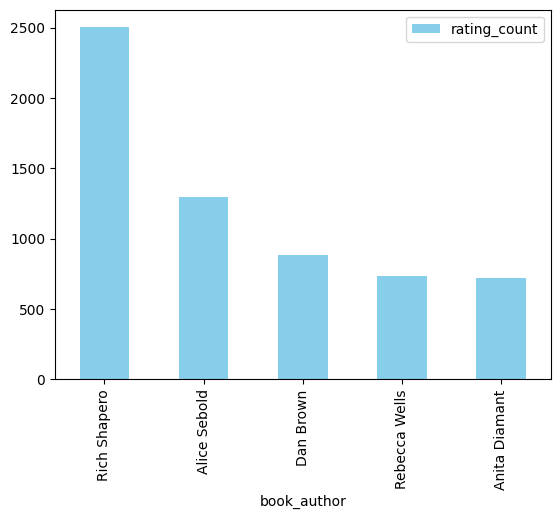

In [18]:
# Group by 'isbn' and count the number of ratings for each ISBN
isbn_rating_counts = books_ratings.groupby(['book_title', 'book_author', 'isbn']).size().reset_index(name='rating_count')

# Display the DataFrame to verify the result
ratings = isbn_rating_counts.sort_values('rating_count', ascending=False).head().plot(kind='bar', x='book_author', y='rating_count', color='skyblue')

In [19]:
isbn_rating_counts.head()

,book_title,book_author,isbn,rating_count
0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,0590567330,4
1,Always Have Popsicles,Rebecca Harvin,0964147726,1
2,Apple Magic (The Collector's series),Martina Boudreau,0942320093,1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",Nancy N. Rue,0310232546,1
4,Beyond IBM: Leadership Marketing and Finance ...,Lou Mobley,0962295701,1


In [20]:
# including the average rating for each book
# Calculate the average rating for each book

to_be_rated = books_ratings[['isbn', 'book_rating']]
averageRating = to_be_rated.groupby('isbn')['book_rating'].mean().round(1).reset_index()
averageRating.rename(columns={'book_rating': 'average_rating'}, inplace=True)
average_rating = averageRating[['isbn','average_rating']]

# Merge the average ratings back with the original dataset
averageRatingdf = pd.merge(isbn_rating_counts, average_rating, on='isbn', how='left')

# Remove duplicate entries
#averageRatingdf = averageRatingdf[['isbn', 'average_rating']].drop_duplicates(subset=['isbn'])

averageRatingdf.head()  

,book_title,book_author,isbn,rating_count,average_rating
0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,0590567330,4,2.2
1,Always Have Popsicles,Rebecca Harvin,0964147726,1,0.0
2,Apple Magic (The Collector's series),Martina Boudreau,0942320093,1,0.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",Nancy N. Rue,0310232546,1,8.0
4,Beyond IBM: Leadership Marketing and Finance ...,Lou Mobley,0962295701,1,0.0


In [21]:
averageRatingdf.shape

(270149, 5)

In [131]:
#saving the average rating dataframe to a csv file'

averageRatingdf.to_csv('data/averageRatingdf.csv', index=False)

### Creating a search engine ###

In [22]:
averageRatingdf["mod_titles"] = averageRatingdf['book_title'].str.replace("[^a-zA-Z0-9]", " ", regex=True)    #removing special characters from book titles   
averageRatingdf.head()

,book_title,book_author,isbn,rating_count,average_rating,mod_titles
0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,0590567330,4,2.2,A Light in the Storm The Civil War Diary of ...
1,Always Have Popsicles,Rebecca Harvin,0964147726,1,0.0,Always Have Popsicles
2,Apple Magic (The Collector's series),Martina Boudreau,0942320093,1,0.0,Apple Magic The Collector s series
3,"Ask Lily (Young Women of Faith: Lily Series, ...",Nancy N. Rue,0310232546,1,8.0,Ask Lily Young Women of Faith Lily Series ...
4,Beyond IBM: Leadership Marketing and Finance ...,Lou Mobley,0962295701,1,0.0,Beyond IBM Leadership Marketing and Finance ...


In [23]:
averageRatingdf.sort_values('rating_count', ascending=False).sample(15)

,book_title,book_author,isbn,rating_count,average_rating,mod_titles
168128,Rising Star,Julia Kent,1558176489,2,2.0,Rising Star
138089,"Mountain of Black Glass (Otherland, Volume 3)",Tad Williams,0886779065,14,1.4,Mountain of Black Glass Otherland Volume 3
176463,Serendipity: Accidental Discoveries in Science,Royston M. Roberts,0471602035,3,2.7,Serendipity Accidental Discoveries in Science
102444,In the Beginning...was the Command Line,Neal Stephenson,0380815931,20,5.9,In the Beginning was the Command Line
40979,Close to Home,Ellen Goodman,0449243516,1,0.0,Close to Home
119220,Let's Go 2000: Paris : The World's Bestselling...,Anna M. Schneider-Mayerson,0312244797,1,8.0,Let s Go 2000 Paris The World s Bestselling...
25640,Beyond Belief : The Secret Gospel of Thomas,ELAINE PAGELS,0375501568,3,3.0,Beyond Belief The Secret Gospel of Thomas
108251,Johnny Panic and the Bible of Dreams : Short S...,Sylvia Plath,0060955295,1,0.0,Johnny Panic and the Bible of Dreams Short S...
2577,A Christmas Miracle,Virginia Henley,0440222907,2,2.0,A Christmas Miracle
132974,Mercury Retrograde: Your Survival Guide to Ast...,Chrissie Blaze,0446677655,1,7.0,Mercury Retrograde Your Survival Guide to Ast...


In [24]:
# Sort the DataFrame by 'average_rating' and 'rating_count' in descending order
sorted_df = averageRatingdf.sort_values(by=['average_rating', 'rating_count'], ascending=[False, False]).head(10)

# Display the top rows
sorted_df

,book_title,book_author,isbn,rating_count,average_rating,mod_titles
219755,The Lord of the Rings (Leatherette Collector's...,J. R. R. Tolkien,0395193958,6,10.0,The Lord of the Rings Leatherette Collector s...
25168,Betsy and Joe (Betsy &amp; Tacy),Maud Hart Lovelace,006440546X,4,10.0,Betsy and Joe Betsy amp Tacy
37660,Charlottes Web Special Read Along Edition,E B White,0760707251,4,10.0,Charlottes Web Special Read Along Edition
38750,Chimps Don't Wear Glasses,Laura Numeroff Joffe,0689801505,4,10.0,Chimps Don t Wear Glasses
39739,Cinder Edna,Ellen Jackson,0688123228,4,10.0,Cinder Edna
58339,Dinotopia: A Land Apart from Time (Dinotopia),James Gurney,0060280034,4,10.0,Dinotopia A Land Apart from Time Dinotopia
99319,I Spy Treasure Hunt: A Book of Picture Riddles...,Walter Wick,0439042445,4,10.0,I Spy Treasure Hunt A Book of Picture Riddles...
196534,The Annotated Alice: The Definitive Edition,Lewis Carroll,0393048470,4,10.0,The Annotated Alice The Definitive Edition
32167,"Bug, Witch and the Robot",Pete Abrams,1929462379,3,10.0,Bug Witch and the Robot
44227,Cooking with Mickey &amp; Friends : More Than ...,Patricia Baird,0786831901,3,10.0,Cooking with Mickey amp Friends More Than ...


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'The Lord of the Rings  Leatherette Collector s Edition '),
  Text(1, 0, 'Betsy and Joe  Betsy  amp  Tacy '),
  Text(2, 0, 'Charlottes Web Special Read Along Edition'),
  Text(3, 0, 'Chimps Don t Wear Glasses'),
  Text(4, 0, 'Cinder Edna'),
  Text(5, 0, 'Dinotopia  A Land Apart from Time  Dinotopia '),
  Text(6, 0, 'I Spy Treasure Hunt  A Book of Picture Riddles  I Spy Books '),
  Text(7, 0, 'The Annotated Alice  The Definitive Edition'),
  Text(8, 0, 'Bug  Witch and the Robot'),
  Text(9, 0, 'Cooking with Mickey  amp  Friends   More Than 30 Recipes for Kids Easy to Make and Even Easier to Eat   Disneys ')])

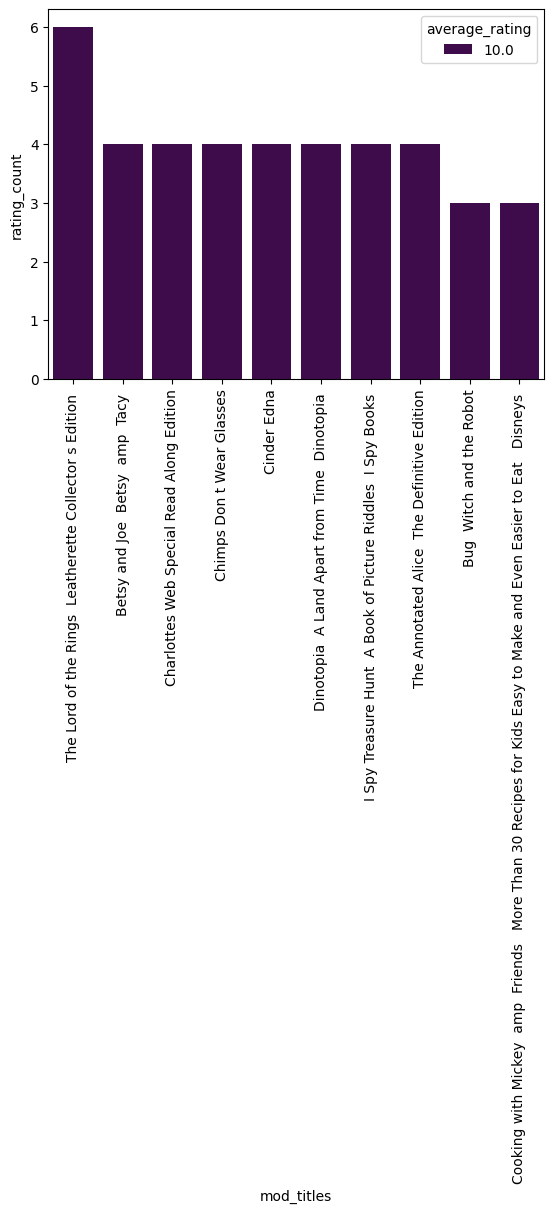

In [25]:
# Plot the top rated books  with the highest rating count   

sns.barplot(x='mod_titles', y='rating_count', hue='average_rating', data=sorted_df, palette='viridis')
plt.xticks(rotation=90)

In [26]:
averageRatingdf['mod_titles'] = averageRatingdf['mod_titles'].str.lower()    #converting book titles to lowercase

In [27]:
averageRatingdf['mod_titles'] = averageRatingdf['mod_titles'].str.replace('\s+', ' ', regex=True)    #removing extra spaces from book titles

In [28]:
averageRatingdf = averageRatingdf[averageRatingdf['mod_titles'].str.len() > 0]    #removing rows with empty book titles

In [29]:
#books_ratings.drop('user_id', axis=1, inplace=True)   #dropping user_id column

In [30]:
averageRatingdf.duplicated().sum()

0

In [31]:
averageRatingdf.rating_count.describe()

count    270149.000000
mean          3.816908
std          13.811739
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2502.000000
Name: rating_count, dtype: float64

<Axes: ylabel='rating_count'>

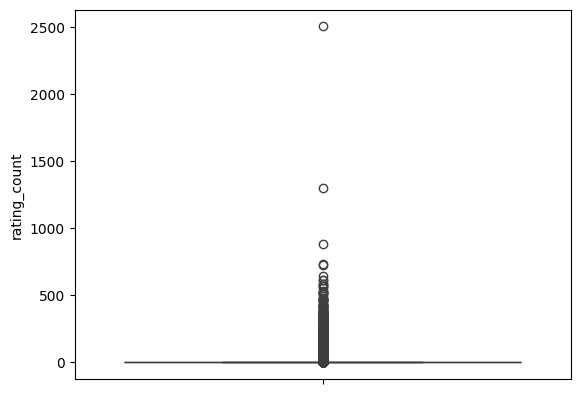

In [32]:
sns.boxplot(averageRatingdf.rating_count)

In [33]:
averageRatingdf['mod_titles'].nunique()

235864

#### Reducing shape of the dataframe ####

In [34]:
ratings = averageRatingdf[averageRatingdf['rating_count'] >= 15]    #filtering out books with less than 15 ratings
ratings.shape

(10394, 6)

#### Building a Term Frequency and then a Inverse Document Frequency matrix ####


In [35]:
# turning titles into TD-IDF matrix => Term Frequency-Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer takes a list of strings as input and turns it into a fd-idf matrix
vectorizer = TfidfVectorizer()

tdidf = vectorizer.fit_transform(ratings['mod_titles'])

In [36]:
# to do comparison between books, we need to calculate the cosine similarity between the books

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re


# query function:

def search(query, vectorizer):
# setting up a search query

    #query = 'The Hobbit'
# preparing the string in the same way as the mod titles above
    processed = re.sub('[^a-zA-Z0-9]', ' ', query.lower())

# we need to turn the query into a vector using the vectorizer

    query_vector = vectorizer.transform([processed])

# to find the similarities we calculate the cosine similarity between the query vector and the tdidf matrix
    similarity = cosine_similarity(query_vector, tdidf).flatten() # flatten is used to turn the matrix into a 1D array

# to find the indices of the 10 largest similarities

    indices = np.argpartition(similarity, -10)[-10:]

# use indices to index the titles

    results = ratings.iloc[indices]   

# as there are many books with the title "The Hobbit", we only want those with the highest number of ratings

    results = results.sort_values(by='rating_count', ascending=False)

    return results.head(10)


In [61]:
search('lord of the rings', vectorizer)    




,book_title,book_author,isbn,rating_count,average_rating,mod_titles
209773,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,0345339703,257,4.5,the fellowship of the ring the lord of the rin...
237241,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,0345339711,177,4.3,the two towers the lord of the rings part 2
229553,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,0345339738,173,4.2,the return of the king the lord of the rings p...
209767,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,0618002227,63,6.2,the fellowship of the ring the lord of the rin...
237235,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,0618002235,39,6.2,the two towers the lord of the rings part 2
29883,Bored of the Rings: A Parody of J.R.R. Tolkien...,Harvard Lampoon Staff,0451452615,31,3.2,bored of the rings a parody of j r r tolkien s...
229541,"The Return of the King (The Lord of The Rings,...",J. R. R. Tolkien,0618002243,28,5.5,the return of the king the lord of the rings p...
209768,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,0618129030,24,5.7,the fellowship of the ring the lord of the rin...
237236,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,0618129081,19,5.9,the two towers the lord of the rings part 2
237229,The Two Towers (Lord of the Rings (Paperback)),J. R. R. Tolkien,0345296060,17,3.8,the two towers lord of the rings paperback


In [43]:
# creating my list of liked books
liked_books = [ '0451526341', '0553212419', '0140132708']
liked_books

['0451526341', '0553212419', '0140132708']

### Making recommendations based on my liked books ###

#### step 1: find all the users that liked the same books as us ####

In [44]:
ratings.head()

,book_title,book_author,isbn,rating_count,average_rating,mod_titles
26,"Q-Space (Star Trek The Next Generation, Book 47)",Greg Cox,0671019155,17,1.9,q space star trek the next generation book 47
78,'Salem's Lot,Stephen King,0451168089,32,3.4,salem s lot
127,01-01-00: The Novel of the Millennium,R. J. Pineiro,0812568710,22,2.8,01 01 00 the novel of the millennium
151,"1,000 Places to See Before You Die",Patricia Schultz,0761104844,17,2.4,1 000 places to see before you die
209,10 Lb. Penalty,Dick Francis,0399143025,17,1.5,10 lb penalty


In [56]:
# use original dataset to find users who liked the same books as me (including individual ratings)

#books_ratings.head()

books_ratings_short = books_ratings[['user_id', 'isbn', 'book_rating', 'book_title']]   

books_ratings_short.head()

filtered_ratings = books_ratings_short[books_ratings_short['isbn'].isin(liked_books) & (books_ratings_short['book_rating'] > 8)]  #filtering out books with ratings higher or equal  8   

filtered_ratings.shape

# create a set with users who liked the same books as me

overlap_users = set()

# # Create tuples (user_id, isbn, book_rating) for the filtered rows
overlap_users = set(filtered_ratings.apply(lambda row: (row['user_id'], row['isbn'],row['book_title'], row['book_rating']), axis=1))

# # Display the overlap_users set
overlap_users

{(3827, '0140132708', "Midnight's Children", 10),
 (5922, '0451526341', 'Animal Farm', 9),
 (6564,
  '0553212419',
  'Sherlock Holmes : The Complete Novels and Stories (Bantam Classic) Volume I',
  10),
 (10047, '0451526341', 'Animal Farm', 9),
 (11676, '0451526341', 'Animal Farm', 10),
 (11676,
  '0553212419',
  'Sherlock Holmes : The Complete Novels and Stories (Bantam Classic) Volume I',
  9),
 (14232, '0451526341', 'Animal Farm', 9),
 (14768, '0451526341', 'Animal Farm', 9),
 (20082, '0451526341', 'Animal Farm', 10),
 (23902, '0451526341', 'Animal Farm', 9),
 (30906, '0140132708', "Midnight's Children", 9),
 (37950, '0451526341', 'Animal Farm', 9),
 (44252, '0451526341', 'Animal Farm', 10),
 (59305, '0140132708', "Midnight's Children", 10),
 (62302, '0451526341', 'Animal Farm', 10),
 (62464, '0451526341', 'Animal Farm', 10),
 (76626, '0451526341', 'Animal Farm', 10),
 (76865, '0451526341', 'Animal Farm', 9),
 (78834, '0451526341', 'Animal Farm', 10),
 (85161, '0140132708', "Midnigh

In [58]:
# making set a dataframe containing any user who read the same book as us and rated the book higher than 8

overlap_users_df = pd.DataFrame(list(overlap_users), columns=['user_id', 'isbn', 'book_title', 'book_rating'])
overlap_users_df

,user_id,isbn,book_title,book_rating
0,112953,0451526341,Animal Farm,9
1,11676,0451526341,Animal Farm,10
2,266775,0451526341,Animal Farm,10
3,218073,0140132708,Midnight's Children,10
4,94896,0451526341,Animal Farm,9
...,...,...,...,...
60,130772,0451526341,Animal Farm,10
61,10047,0451526341,Animal Farm,9
62,23902,0451526341,Animal Farm,9
63,89014,0451526341,Animal Farm,10


In [62]:
len(overlap_users_df)

65

In [63]:
overlap_users_df['isbn'] = overlap_users_df['isbn'].astype(str)   #converting isbn to string

#### step 2: finding what those users liked ####

In [95]:
# finding books that the users in the overlap_users_df have read and rated highly

total_books = books_ratings_short[books_ratings_short['user_id'].isin(overlap_users_df['user_id'])]   #filtering out books read by users in the overlap_users_df
total_books = total_books[total_books['book_rating'] > 8]   #filtering out books with ratings higher than 8
recommended = total_books[~total_books['isbn'].isin(liked_books)]   #filtering out books that I have already liked
recommended_2 = recommended['isbn'].value_counts().head(10)   #finding the top 10 books that the users in the overlap_users_df have read and rated highly



In [100]:
len(recommended_2)

10

In [96]:
total_books.head()

,user_id,isbn,book_rating,book_title
31,11676,0399135782,9,The Kitchen God's Wife
114,11676,0440234743,9,The Testament
604,119858,0452264464,10,Beloved (Plume Contemporary Fiction)
722,11676,1841721522,10,New Vegetarian: Bold and Beautiful Recipes for...
3494,11676,0345417623,10,Timeline


In [98]:
total_books['isbn'].astype(str)

31         0399135782
114        0440234743
604        0452264464
722        1841721522
3494       0345417623
              ...    
1030021    9071867137
1031779    0805076476
1031780    0812815092
1031781    1857939093
1031783    1880325055
Name: isbn, Length: 3839, dtype: object

In [ ]:
# Convert recommended_2 Series to DataFrame
recommended_2_df = recommended_2.reset_index()
recommended_2_df.columns = ['isbn', 'count']



In [101]:
recommended_2_df

,isbn,count
0,0451524934,8
1,0316769487,7
2,0446310786,6
3,0399501487,5
4,0553212427,4
5,0140042598,4
6,059035342X,4
7,0345361792,3
8,0451163966,3
9,006440188X,3


In [110]:
# Merge with books DataFrame to get book titles
recommended_with_titles = pd.merge(recommended_2_df, total_books[['isbn', 'book_title']], on='isbn', how='left')

# Display the result
recommended_with_titles[['isbn', 'book_title']].value_counts().reset_index(name='count')

,isbn,book_title,count
0,0451524934,1984,8
1,0316769487,The Catcher in the Rye,7
2,0446310786,To Kill a Mockingbird,6
3,0399501487,Lord of the Flies,5
4,0140042598,On the Road,4
5,0553212427,Sherlock Holmes: The Complete Novels and Stori...,4
6,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,4
7,006440188X,The Secret Garden,3
8,0345361792,A Prayer for Owen Meany,3
9,0451163966,One Flew Over the Cuckoo's Nest,3


#### step 3: fine tuning the recommendations ####

In [111]:
total_books.head()

,user_id,isbn,book_rating,book_title
31,11676,0399135782,9,The Kitchen God's Wife
114,11676,0440234743,9,The Testament
604,119858,0452264464,10,Beloved (Plume Contemporary Fiction)
722,11676,1841721522,10,New Vegetarian: Bold and Beautiful Recipes for...
3494,11676,0345417623,10,Timeline


In [125]:
#creating a column book_count  

recommended['book_count'] = recommended.groupby('isbn')['isbn'].transform('count')
recommended

/var/folders/vv/4d0yjm893_xcqs8y21lfl70c0000gn/T/ipykernel_27010/571155537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended['book_count'] = recommended.groupby('isbn')['isbn'].transform('count')


,user_id,isbn,book_rating,book_title,book_count
31,11676,0399135782,9,The Kitchen God's Wife,1
114,11676,0440234743,9,The Testament,1
604,119858,0452264464,10,Beloved (Plume Contemporary Fiction),1
722,11676,1841721522,10,New Vegetarian: Bold and Beautiful Recipes for...,1
3494,11676,0345417623,10,Timeline,1
...,...,...,...,...,...
1030021,240144,9071867137,10,The World of Michael Parkes,1
1031779,245295,0805076476,10,Fight Club : A Novel,1
1031780,245295,0812815092,10,The truth about unicorns,1
1031781,245295,1857939093,9,Peter Pan and Wendy,1


In [126]:
# creatig a popularity score for each book / we want to look for books that are popular among users like us

recommended['popularity'] = recommended['book_count'] * recommended['book_count'] / recommended['book_rating']
recommended.head()

/var/folders/vv/4d0yjm893_xcqs8y21lfl70c0000gn/T/ipykernel_27010/2320910691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended['popularity'] = recommended['book_count'] * recommended['book_count'] / recommended['book_rating']


,user_id,isbn,book_rating,book_title,book_count,popularity
31,11676,0399135782,9,The Kitchen God's Wife,1,0.111111
114,11676,0440234743,9,The Testament,1,0.111111
604,119858,0452264464,10,Beloved (Plume Contemporary Fiction),1,0.100000
722,11676,1841721522,10,New Vegetarian: Bold and Beautiful Recipes for...,1,0.100000
3494,11676,0345417623,10,Timeline,1,0.100000


In [127]:
tailored_recs = recommended.sort_values('popularity', ascending=False)
tailored_recs

,user_id,isbn,book_rating,book_title,book_count,popularity
94451,112083,0451524934,9,1984,8,7.111111
94458,123544,0451524934,9,1984,8,7.111111
94478,154176,0451524934,9,1984,8,7.111111
94512,210168,0451524934,9,1984,8,7.111111
94395,44252,0451524934,10,1984,8,6.400000
...,...,...,...,...,...,...
517801,158506,0345447980,10,Planet of the Apes,1,0.100000
517886,231210,0525945253,10,The Kid: What Happened After My Boyfriend and ...,1,0.100000
517943,11676,0590423541,10,Black Beauty,1,0.100000
517978,11676,0689808658,10,The Twelve Days of Christmas : A Pop-Up Celebr...,1,0.100000


In [130]:
tailored_recs[['isbn', 'book_title', 'popularity']].value_counts().reset_index(name='count').head(10)

,isbn,book_title,popularity,count
0,0316769487,The Catcher in the Rye,4.900000,5
1,0446310786,To Kill a Mockingbird,3.600000,5
2,0451524934,1984,7.111111,4
3,0451524934,1984,6.400000,4
4,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,1.600000,4
5,0380002930,Watership Down,0.900000,3
6,0399501487,Lord of the Flies,2.777778,3
7,0345361792,A Prayer for Owen Meany,0.900000,3
8,0140042598,On the Road,1.600000,3
9,0451190521,The Green Mile: The Mouse on the Mile (Green M...,0.400000,2
